
## Introduction
Devoir final du cours de Big Data. Dans ce notebook, nous allons analyser et présenter des données liées au salaire moyen et au tourisme des pays du monde en suivant les principes de zone Bronze/Silver/Gold.

## Étapes
- Bronze : chargement des données brutes.
- Silver : filtrage des données.
- Gold : agrégation des tables pour pousser l'analyse des données néttoyées

Création de la session SPARK

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg
import matplotlib.pyplot as plt

spark = SparkSession.builder \
    .appName("TravelHabits") \
    .config("spark.sql.catalog.spark_catalog", "org.apache.iceberg.spark.SparkCatalog") \
    .config("spark.sql.catalog.spark_catalog.type", "hadoop") \
    .config("spark.sql.catalog.spark_catalog.warehouse", "dbfs:/iceberg/warehouse") \
    .getOrCreate()

# Zone Bronze : Chargement des données brutes

La zone Bronze contient les données brutes dans leur état original pour garantir la traçabilité et la possibilité de revenir aux sources en cas de besoin. Cela inclut des métadonnées pour le suivi de la provenance et des transformations éventuelles.

In [0]:
salaries_path = "/FileStore/tables/dataset_salaire_moyen_par_pays-1.csv"
arrivals_path = "/FileStore/tables/dataset_arrivees_touristes_par_pays-1.csv"
departures_path = "/FileStore/tables/dataset_departs_internationaux_par_pays.csv"

# Chargement des données brutes
df_salaries = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load(salaries_path)
df_arrivals = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load(arrivals_path)
df_departures = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load(departures_path)

# Sauvegarde des données brutes au format Iceberg
df_salaries.writeTo("spark_catalog.bronze.salaries").using("iceberg").createOrReplace()
df_arrivals.writeTo("spark_catalog.bronze.arrivals").using("iceberg").createOrReplace()
df_departures.writeTo("spark_catalog.bronze.departures").using("iceberg").createOrReplace()

df_salaries.printSchema()
df_arrivals.printSchema()
df_departures.printSchema()

display(df_salaries)
display(df_arrivals)
display(df_departures)

root
 |-- country_name: string (nullable = true)
 |-- continent_name: string (nullable = true)
 |-- wage_span: string (nullable = true)
 |-- median_salary: double (nullable = true)
 |-- average_salary: double (nullable = true)
 |-- lowest_salary: double (nullable = true)
 |-- highest_salary: double (nullable = true)

root
 |-- country: string (nullable = true)
 |-- touristArrivals: integer (nullable = true)

root
 |-- Entity: string (nullable = true)
 |-- Code: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- out_tour_departures_ovn_vis_tourists: double (nullable = true)



country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary
Afghanistan,Asia,Monthly,853.74,1001.15,252.53,4460.97
Aland Islands,Europe,Monthly,3319.24,3858.35,972.52,17124.74
Albania,Europe,Monthly,832.84,956.92,241.22,4258.49
Algeria,Africa,Monthly,1148.84,1308.81,330.11,5824.18
American Samoa,Oceania,Monthly,1390.0,1570.0,400.0,6980.0
Andorra,Europe,Monthly,3668.08,4069.77,1120.51,17653.28
Angola,Africa,Monthly,284.39,314.39,79.32,1403.96
Antigua and Barbuda,Caribbean,Monthly,1548.15,1677.78,422.22,7444.44
Argentina,South America,Monthly,110.28,129.42,32.57,577.13
Armenia,Asia,Monthly,1700.25,1974.32,497.39,8780.39


country,touristArrivals
France,89400000
Spain,83700000
United States,79300000
China,65700000
Italy,64500000
Turkey,51200000
Mexico,45000000
Thailand,39800000
Germany,39600000
United Kingdom,39400000


Entity,Code,Year,out_tour_departures_ovn_vis_tourists
Algeria,DZA,1995,1090000.0
Algeria,DZA,1996,874000.0
Algeria,DZA,1997,827000.0
Algeria,DZA,1998,879000.0
Algeria,DZA,1999,903000.0
Algeria,DZA,2000,1006000.0
Algeria,DZA,2001,1190000.0
Algeria,DZA,2002,1257000.0
Algeria,DZA,2003,1254000.0
Algeria,DZA,2004,1417000.0


# Zone Silver : Nettoyage et transformation

La zone Silver représente des données nettoyées et transformées, prêtes pour des analyses plus approfondies. Les opérations incluent la suppression des doublons, le traitement des valeurs nulles, et l'application des règles métier pour un alignement des données.

In [0]:
# Nettoyage et harmonisation
df_departures = df_departures.withColumnRenamed("Entity", "country") \
    .withColumnRenamed("out_tour_departures_ovn_vis_tourists", "departures") \
    .drop("Code") \
    .filter(col("Year") == 2021) \
    .filter(col("departures").isNotNull())

df_salaries = df_salaries.withColumnRenamed("country_name", "country") \
    .withColumnRenamed("average_salary", "avg_salary") \
    .drop("continent_name", "wage_span") \
    .filter(col("avg_salary").isNotNull())

df_arrivals = df_arrivals.withColumnRenamed("country", "destination") \
    .withColumnRenamed("touristArrivals", "arrivals") \
    .filter(col("arrivals").isNotNull())

# Sauvegarde des données nettoyées au format Iceberg
df_departures.writeTo("spark_catalog.silver.departures").using("iceberg").createOrReplace()
df_salaries.writeTo("spark_catalog.silver.salaries").using("iceberg").createOrReplace()
df_arrivals.writeTo("spark_catalog.silver.arrivals").using("iceberg").createOrReplace()

df_salaries.printSchema()
df_arrivals.printSchema()
df_departures.printSchema()

display(df_salaries)
display(df_arrivals)
display(df_departures)

root
 |-- country: string (nullable = true)
 |-- median_salary: double (nullable = true)
 |-- avg_salary: double (nullable = true)
 |-- lowest_salary: double (nullable = true)
 |-- highest_salary: double (nullable = true)

root
 |-- destination: string (nullable = true)
 |-- arrivals: integer (nullable = true)

root
 |-- country: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- departures: double (nullable = true)



country,median_salary,avg_salary,lowest_salary,highest_salary
Afghanistan,853.74,1001.15,252.53,4460.97
Aland Islands,3319.24,3858.35,972.52,17124.74
Albania,832.84,956.92,241.22,4258.49
Algeria,1148.84,1308.81,330.11,5824.18
American Samoa,1390.0,1570.0,400.0,6980.0
Andorra,3668.08,4069.77,1120.51,17653.28
Angola,284.39,314.39,79.32,1403.96
Antigua and Barbuda,1548.15,1677.78,422.22,7444.44
Argentina,110.28,129.42,32.57,577.13
Armenia,1700.25,1974.32,497.39,8780.39


destination,arrivals
France,89400000
Spain,83700000
United States,79300000
China,65700000
Italy,64500000
Turkey,51200000
Mexico,45000000
Thailand,39800000
Germany,39600000
United Kingdom,39400000


country,Year,departures
Algeria,2021,344000.0
Argentina,2021,833000.0
Armenia,2021,423000.0
Austria,2021,7522000.0
Belarus,2021,477000.0
Belgium,2021,8593000.0
Bolivia,2021,376000.0
Bulgaria,2021,4094000.0
Cambodia,2021,30500.0
Canada,2021,4954000.0


# Zone Gold : Modélisation

La zone Gold fournit des données prêtes pour la consommation, organisées pour des cas d'usage spécifiques. Ici, nous avons créé une table de faits en joignant les datasets nettoyés pour faciliter les analyses décisionnelles

In [0]:
# Création de la table des faits
df_fact = df_departures.join(df_salaries, on="country", how="inner") \
    .join(df_arrivals, df_departures["country"] == df_arrivals["destination"], how="left") \
    .select(
        col("country"),
        col("avg_salary"),
        col("departures").alias("nb_departures"),
        col("arrivals").alias("nb_arrivals")
    )

# Sauvegarde en Iceberg
df_fact.writeTo("spark_catalog.gold.fact_table").using("iceberg").createOrReplace()

# Affichage des résultats pour vérification
display(df_fact)

country,avg_salary,nb_departures,nb_arrivals
Algeria,1308.81,344000.0,null
Argentina,129.42,833000.0,7400000
Armenia,1974.32,423000.0,null
Austria,4016.91,7522000.0,31900000
Belarus,983.28,477000.0,null
Belgium,6522.2,8593000.0,9300000
Bolivia,1236.99,376000.0,null
Bulgaria,1794.59,4094000.0,9300000
Cambodia,808.3,30500.0,6600000
Canada,7352.94,4954000.0,22100000


# Analyse des données

Nous explorons les relations entre différents attributs pour mieux comprendre les interactions entre les variables clés. Les visualisations aident à détecter les tendances et à tirer des conclusions pertinentes

## Analyse 1 : Salaire moyen et départs internationaux

Nous cherchons à voir s'il y a une corrélation entre le salaire moyen d'un pays et le nombre de voyages à l'étranger de ses habitants 

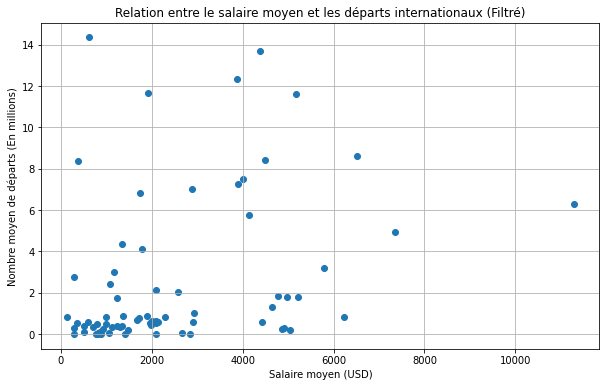

In [0]:
avg_salary_vs_departures = df_fact.select("avg_salary", "nb_departures").groupBy("avg_salary").avg("nb_departures")

# Filtrer les valeurs dont les départs sont supérieures à 15 millions
filtered_data = avg_salary_vs_departures.filter(avg_salary_vs_departures["avg(nb_departures)"] <= 15_000_000)

# Convertir les données filtrées
filtered_data_pd = filtered_data.toPandas()
filtered_data_pd["avg(nb_departures)"] = filtered_data_pd["avg(nb_departures)"] / 1e6

# Plot des données filtrés
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data_pd["avg_salary"], filtered_data_pd["avg(nb_departures)"])
plt.title("Relation entre le salaire moyen et les départs internationaux (Filtré)")
plt.xlabel("Salaire moyen (USD)")
plt.ylabel("Nombre moyen de départs (En millions)")
plt.grid(True)
plt.show()

## Analyse 2 : Salaire moyen et arrivées touristiques

Nous cherchons à voir s'il y a une corrélation entre le salaire moyen d'un pays et le nombre de touristes venant visiter le pays

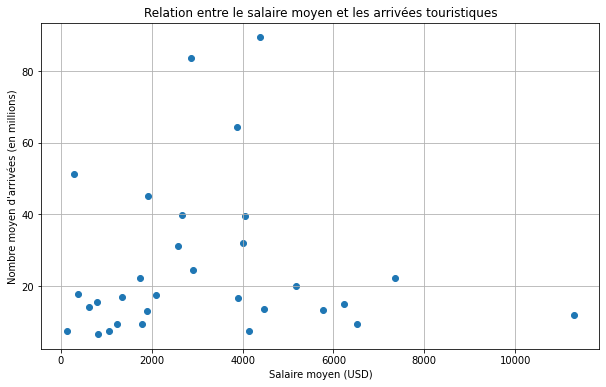

In [0]:
avg_salary_vs_arrivals = df_fact.select("avg_salary", "nb_arrivals").groupBy("avg_salary").avg("nb_arrivals")
avg_salary_vs_arrivals_pd = avg_salary_vs_arrivals.toPandas()
avg_salary_vs_arrivals_pd["avg(nb_arrivals)"] /= 1e6

plt.figure(figsize=(10, 6))
plt.scatter(avg_salary_vs_arrivals_pd["avg_salary"], avg_salary_vs_arrivals_pd["avg(nb_arrivals)"])
plt.title("Relation entre le salaire moyen et les arrivées touristiques")
plt.xlabel("Salaire moyen (USD)")
plt.ylabel("Nombre moyen d'arrivées (en millions)")
plt.grid(True)
plt.show()

## Export des résultats

Les résultats finaux sont sauvegardés dans le datalake au format CSV pour garantir une accessibilité universelle et un partage facilité

In [0]:
# Création du répertoire "exports" dans le datalake (DBFS)
dbutils.fs.mkdirs("dbfs:/mnt/datalake/exports")

# Export des résultats dans un répertoire temporaire
fact_table_path = "/tmp/fact_table_analysis.csv"
df_fact.toPandas().to_csv(fact_table_path, index=False)

# Copie du fichier exporté depuis le répertoire temporaire vers le répertoire cible dans le datalake
dbutils.fs.cp(f"file:{fact_table_path}", "dbfs:/mnt/datalake/exports/fact_table_analysis.csv")

# Vérification que les fichiers ont bien été copiés dans le répertoire cible
display(dbutils.fs.ls("dbfs:/mnt/datalake/exports"))

print("Analyse terminée et résultats exportés dans le datalake.")

path,name,size,modificationTime
dbfs:/mnt/datalake/exports/fact_table_analysis.csv,fact_table_analysis.csv,2331,1735642943000


Analyse terminée et résultats exportés dans le datalake.
